In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import wilcoxon

In [2]:
df_dropped = pd.read_csv('Ecommerce_dropped.csv', index_col=0)
df_filled = pd.read_csv('Ecommerce_filled.csv', index_col=0)

In [3]:
X_dropped = df_dropped.drop("Churn", axis=1)
y_dropped = df_dropped['Churn']
X_filled = df_filled.drop("Churn", axis=1)
y_filled = df_filled['Churn']

I'm going to use many different clissifiers in order to see which of them is the most efficient, looking at their f1-score. I'm also using a Stratified K Fold with k=5 as a cross validator. Due the fact that the class are imbalanced I will use SMOTE.

In [4]:
def eval_cross_validation(pipeline, skf, X, y, title):
    list_df = []
    list_accuracy = []
    y_pred_cm = []

    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]
        y_tr = y.values[train]
        X_val = X.values[val]
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val,y_pred,output_dict = True)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
        for x in y_pred:
            y_pred_cm.append(x)
        


    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()
    
    # compute average accuracy and print confusion matrix
    accuracy_avg = np.mean(list_accuracy)
    #y_pred_arr = np.array(y_pred_cm)
    #y_pred_adj = y_pred_arr.reshape(1, -1)
    #y_pred_final = np.array(y_pred_adj)
    #print(y_pred_arr)
    #print(y_pred_adj)
    #print(y_pred_final)
    #print(y_pred_cm)
    ConfusionMatrixDisplay.from_predictions(y, y_pred_cm)
    plt.title(title)
    plt.show()
    return df_avg, accuracy_avg  

In [5]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
fscore_filled_list = []
fscore_dropped_list = []
classifiers_list=[]

In [6]:
pipe_dec_tree = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', DecisionTreeClassifier(random_state=123))
    ])
classifiers_list.append("Decision \nTree")

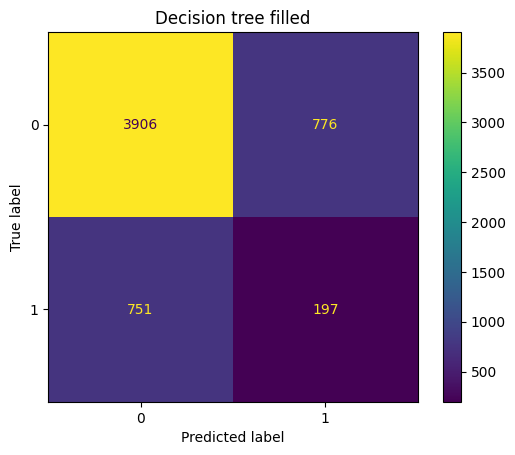

In [7]:
df_dec_tree_filled, acc_dec_tree_filled = eval_cross_validation(pipe_dec_tree, skf, X_filled, y_filled, "Decision tree filled")

In [8]:
df_dec_tree_filled

,0,1,macro avg,weighted avg
f1-score,0.974183,0.874672,0.924428,0.957419
precision,0.976853,0.864763,0.920808,0.957969
recall,0.971590,0.886121,0.928855,0.957194
support,936.400000,189.600000,1126.000000,1126.000000


In [9]:
acc_dec_tree_filled

0.9571936056838366

In [10]:
fscore_dec_tree_filled = cross_val_score(pipe_dec_tree, 
                                  X_filled, 
                                  y_filled, 
                                  scoring ='f1',
                                  cv = skf)

In [11]:
fscore_dec_tree_filled.mean()

0.7774082501053253

In [12]:
fscore_filled_list.append(fscore_dec_tree_filled.mean())

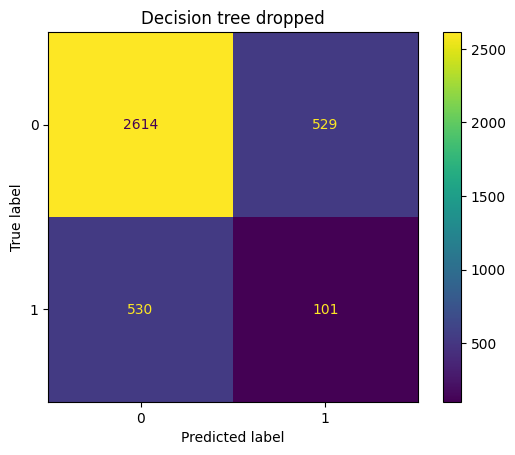

In [13]:
df_dec_tree_dropped, acc_dec_tree_dropped = eval_cross_validation(pipe_dec_tree, skf, X_dropped, y_dropped, "Decision tree dropped")

In [14]:
df_dec_tree_dropped

,0,1,macro avg,weighted avg
f1-score,0.972473,0.863041,0.917757,0.954178
precision,0.972332,0.864535,0.918433,0.954318
recall,0.972642,0.862155,0.917399,0.954162
support,628.600000,126.200000,754.800000,754.800000


In [15]:
acc_dec_tree_dropped

0.9541623482705923

In [16]:
fscore_dec_tree_dropped = cross_val_score(pipe_dec_tree, 
                                  X_dropped, 
                                  y_dropped, 
                                  scoring ='f1',
                                  cv = skf)

In [17]:
fscore_dec_tree_dropped.mean()

0.7700325514415418

In [18]:
fscore_dropped_list.append(fscore_dec_tree_dropped.mean())

In [19]:
pipe_adaboost = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', AdaBoostClassifier())
    ])
classifiers_list.append("Adaboost")

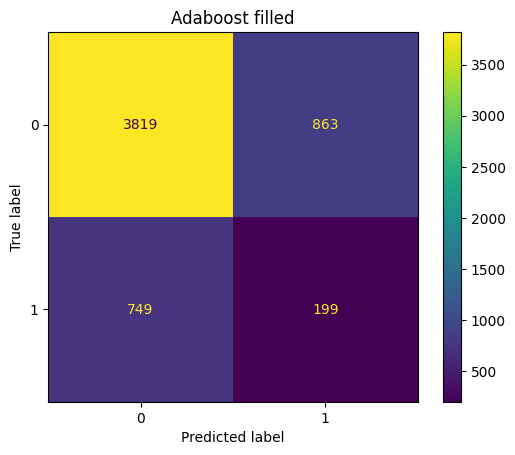

In [20]:
df_adaboost_filled, acc_adaboost_filled = eval_cross_validation(pipe_adaboost, skf, X_filled, y_filled, "Adaboost filled")

In [21]:
df_adaboost_filled

,0,1,macro avg,weighted avg
f1-score,0.929934,0.677713,0.803823,0.887462
precision,0.941558,0.641783,0.791671,0.891074
recall,0.918621,0.718340,0.818481,0.884902
support,936.400000,189.600000,1126.000000,1126.000000


In [22]:
acc_adaboost_filled

0.8849023090586146

In [23]:
fscore_adaboost_filled = cross_val_score(pipe_adaboost, 
                                  X_filled, 
                                  y_filled, 
                                  scoring ='f1',
                                  cv = skf)

In [24]:
fscore_adaboost_filled.mean()

0.6870983410213845

In [25]:
fscore_filled_list.append(fscore_adaboost_filled.mean())

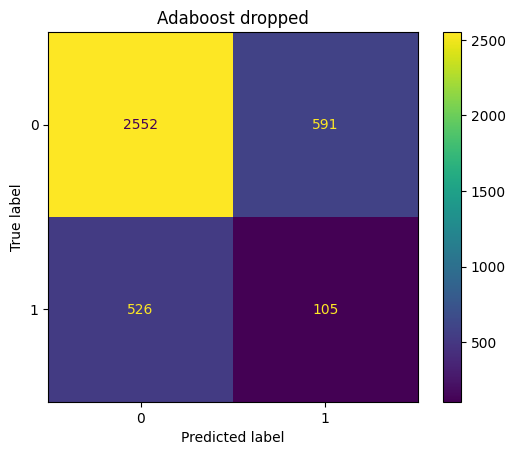

In [26]:
df_adaboost_dropped, acc_adaboost_dropped = eval_cross_validation(pipe_adaboost, skf, X_dropped, y_dropped, "Adaboost dropped")

In [27]:
df_adaboost_dropped

,0,1,macro avg,weighted avg
f1-score,0.932314,0.682838,0.807576,0.890604
precision,0.942192,0.651685,0.796939,0.893619
recall,0.922687,0.717898,0.820293,0.888452
support,628.600000,126.200000,754.800000,754.800000


In [28]:
acc_adaboost_dropped

0.8884515256380979

In [29]:
fscore_adaboost_dropped = cross_val_score(pipe_adaboost, 
                                  X_dropped, 
                                  y_dropped, 
                                  scoring ='f1',
                                  cv = skf)

In [30]:
fscore_adaboost_dropped.mean()

0.6716521181265592

In [31]:
fscore_dropped_list.append(fscore_adaboost_dropped.mean())

In [32]:
pipe_random_forest = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', RandomForestClassifier())
    ])
classifiers_list.append("Random \nForest")

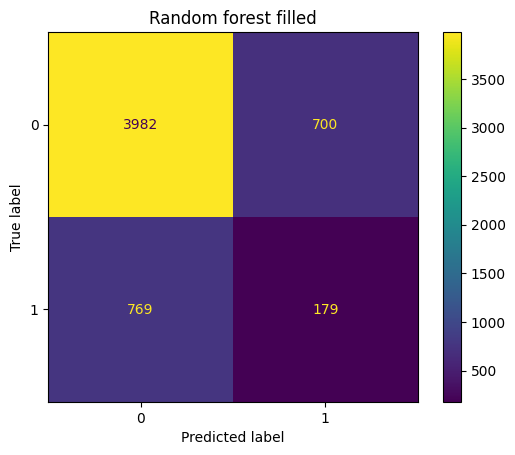

In [33]:
df_random_forest_filled, acc_random_forest_filled = eval_cross_validation(pipe_random_forest, skf, X_filled, y_filled, "Random forest filled")

In [34]:
df_random_forest_filled

,0,1,macro avg,weighted avg
f1-score,0.982730,0.910503,0.946616,0.970562
precision,0.975623,0.946429,0.961026,0.970706
recall,0.989961,0.877705,0.933833,0.971048
support,936.400000,189.600000,1126.000000,1126.000000


In [35]:
acc_random_forest_filled

0.9710479573712256

In [36]:
fscore_random_forest_filled = cross_val_score(pipe_random_forest, 
                                  X_filled, 
                                  y_filled, 
                                  scoring ='f1',
                                  cv = skf)

In [37]:
fscore_random_forest_filled.mean()

0.8903556331832648

In [38]:
fscore_filled_list.append(fscore_random_forest_filled.mean())

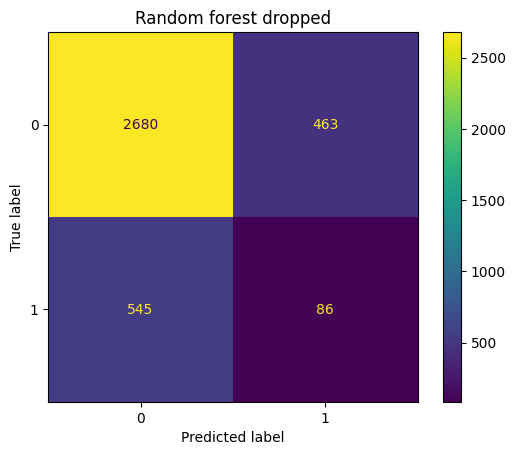

In [39]:
df_random_forest_dropped, acc_random_forest_dropped = eval_cross_validation(pipe_random_forest, skf, X_dropped, y_dropped, "Random forest dropped")

In [40]:
df_random_forest_dropped

,0,1,macro avg,weighted avg
f1-score,0.978333,0.882960,0.930646,0.962386
precision,0.965912,0.949303,0.957608,0.963143
recall,0.991094,0.825722,0.908408,0.963436
support,628.600000,126.200000,754.800000,754.800000


In [41]:
acc_random_forest_dropped

0.9634359794122297

In [42]:
fscore_random_forest_dropped = cross_val_score(pipe_random_forest, 
                                  X_dropped, 
                                  y_dropped, 
                                  scoring ='f1',
                                  cv = skf)

In [43]:
fscore_random_forest_dropped.mean()

0.8636587485237099

In [44]:
fscore_dropped_list.append(fscore_random_forest_dropped.mean())

In [45]:
pipe_naivebayes = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', GaussianNB())
    ])
classifiers_list.append("Naive \nBayes")

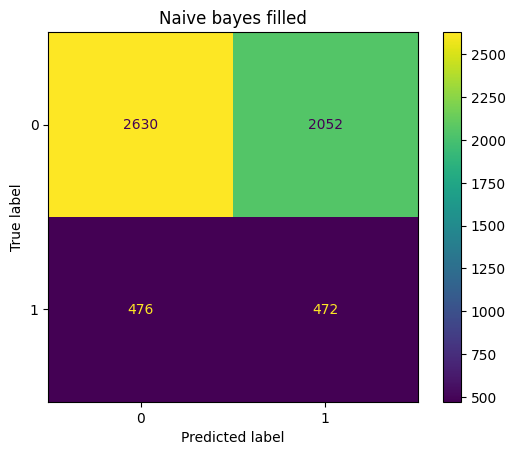

In [46]:
df_naivebayes_filled, acc_naivebayes_filled = eval_cross_validation(pipe_naivebayes, skf, X_filled, y_filled, "Naive bayes filled")

In [47]:
df_naivebayes_filled

,0,1,macro avg,weighted avg
f1-score,0.748077,0.435598,0.591837,0.695460
precision,0.938406,0.299860,0.619133,0.830886
recall,0.622384,0.797488,0.709936,0.651865
support,936.400000,189.600000,1126.000000,1126.000000


In [48]:
acc_naivebayes_filled

0.6518650088809947

In [49]:
fscore_naivebayes_filled = cross_val_score(pipe_naivebayes, 
                                  X_filled, 
                                  y_filled, 
                                  scoring ='f1',
                                  cv = skf)

In [50]:
fscore_naivebayes_filled.mean()

0.3978807317751519

In [51]:
fscore_filled_list.append(fscore_naivebayes_filled.mean())

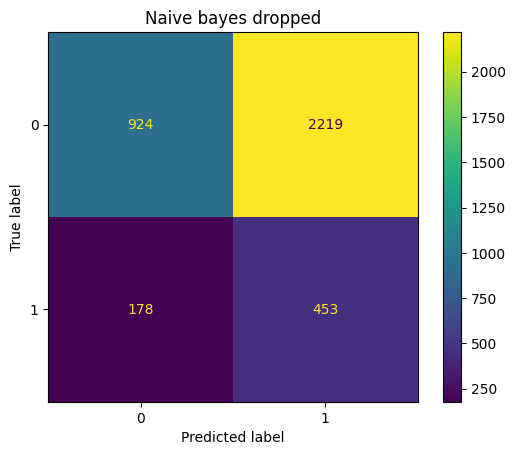

In [52]:
df_naivebayes_dropped, acc_naivebayes_dropped = eval_cross_validation(pipe_naivebayes, skf, X_dropped, y_dropped, "Naive bayes dropped")

In [53]:
df_naivebayes_dropped

,0,1,macro avg,weighted avg
f1-score,0.501756,0.359656,0.430706,0.477999
precision,0.966523,0.222296,0.594409,0.842090
recall,0.338848,0.941345,0.640096,0.439586
support,628.600000,126.200000,754.800000,754.800000


In [54]:
acc_naivebayes_dropped

0.4395861366311241

In [55]:
fscore_naivebayes_dropped = cross_val_score(pipe_naivebayes, 
                                  X_dropped, 
                                  y_dropped, 
                                  scoring ='f1',
                                  cv = skf)

In [56]:
fscore_naivebayes_dropped.mean()

0.345196308574663

In [57]:
fscore_dropped_list.append(fscore_naivebayes_dropped.mean())

In [58]:
pipe_logreg = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', LogisticRegression(max_iter=3000))
    ])
classifiers_list.append("Logistic \nRegression")

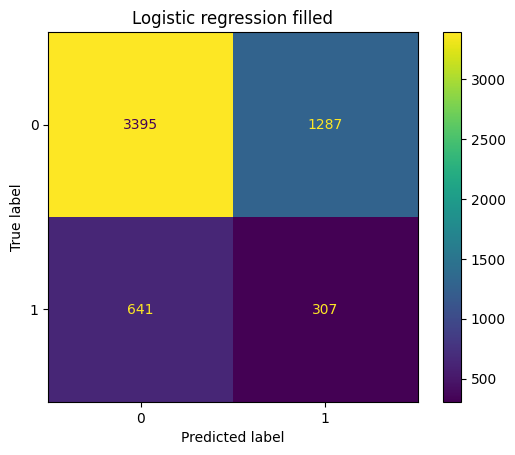

In [59]:
df_logreg_filled, acc_logreg_filled = eval_cross_validation(pipe_logreg, skf, X_filled, y_filled, "Logistic regression filled")

In [60]:
df_logreg_filled

,0,1,macro avg,weighted avg
f1-score,0.886875,0.612189,0.749532,0.840619
precision,0.957911,0.488348,0.723130,0.878840
recall,0.825712,0.820702,0.823207,0.824867
support,936.400000,189.600000,1126.000000,1126.000000


In [61]:
acc_logreg_filled

0.8248667850799288

In [62]:
fscore_logreg_filled = cross_val_score(pipe_logreg, 
                                  X_filled, 
                                  y_filled, 
                                  scoring ='f1',
                                  cv = skf)

In [63]:
fscore_logreg_filled.mean()

0.6750931782381113

In [64]:
fscore_filled_list.append(fscore_logreg_filled.mean())

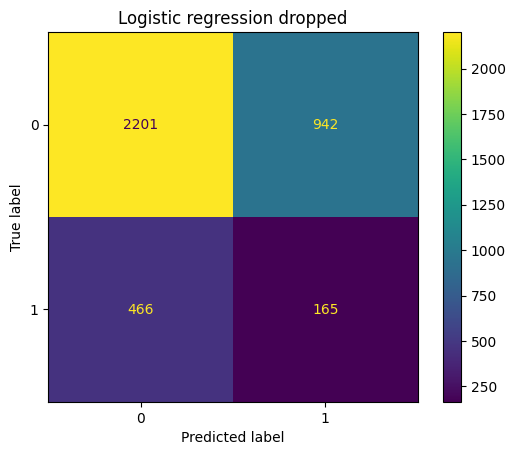

In [65]:
df_logreg_dropped, acc_logreg_dropped = eval_cross_validation(pipe_logreg, skf, X_dropped, y_dropped, "Logistic regression dropped")

In [66]:
df_logreg_dropped

,0,1,macro avg,weighted avg
f1-score,0.876429,0.586556,0.731492,0.827968
precision,0.954744,0.460485,0.707614,0.872105
recall,0.810055,0.808186,0.809121,0.809755
support,628.600000,126.200000,754.800000,754.800000


In [67]:
acc_logreg_dropped

0.809754597993922

In [68]:
fscore_logreg_dropped = cross_val_score(pipe_logreg, 
                                  X_dropped, 
                                  y_dropped, 
                                  scoring ='f1',
                                  cv = skf)

In [69]:
fscore_logreg_dropped.mean()

0.6583326166763948

In [70]:
fscore_dropped_list.append(fscore_logreg_dropped.mean())

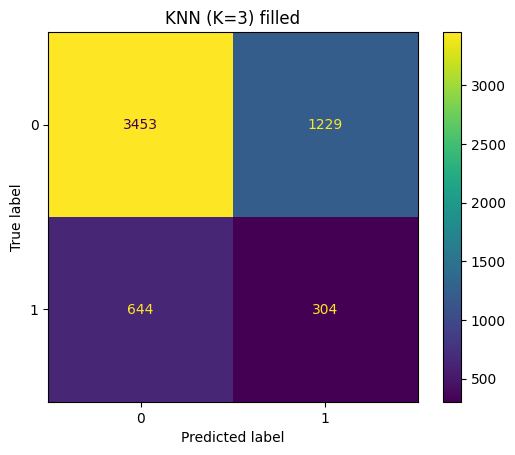

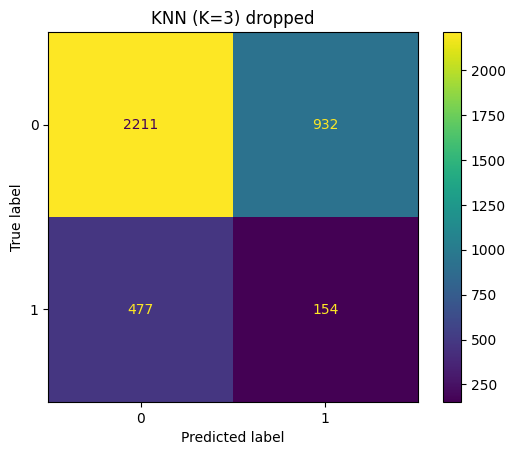

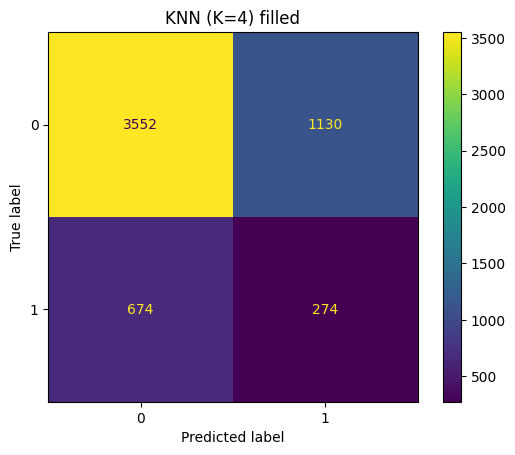

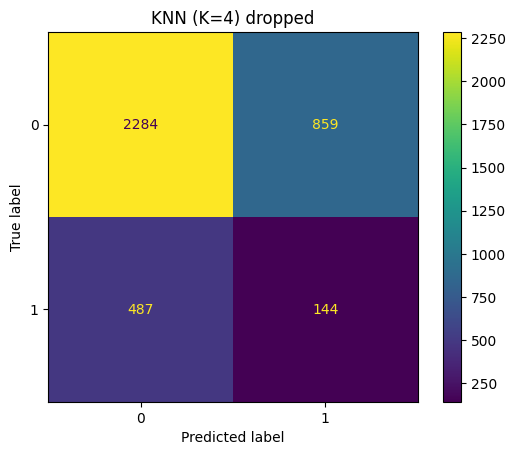

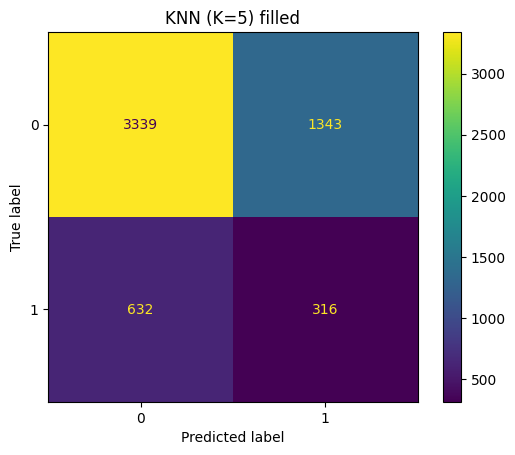

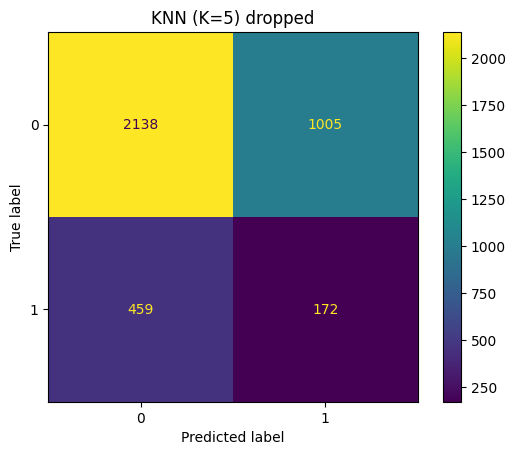

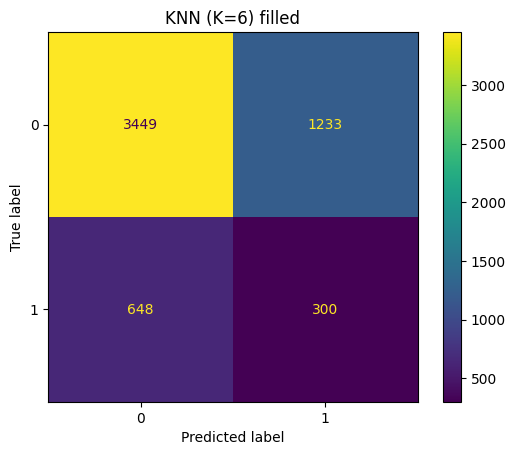

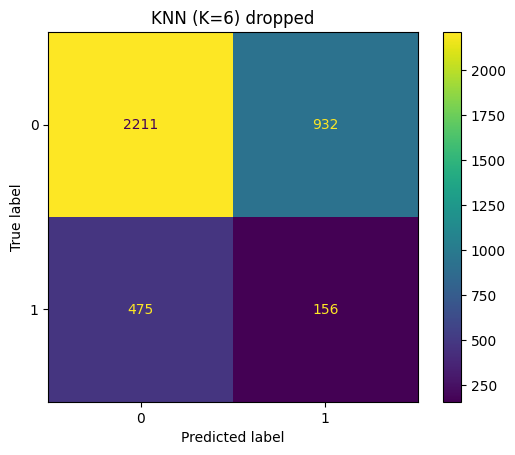

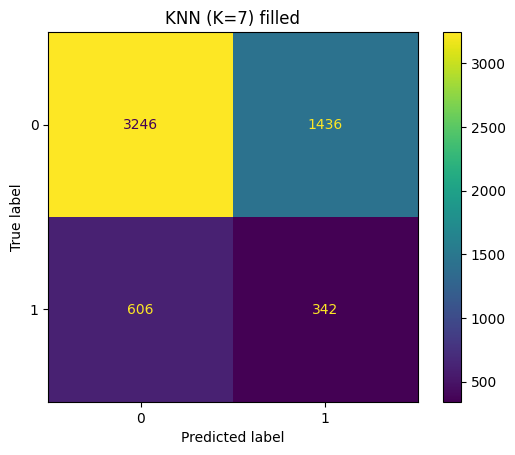

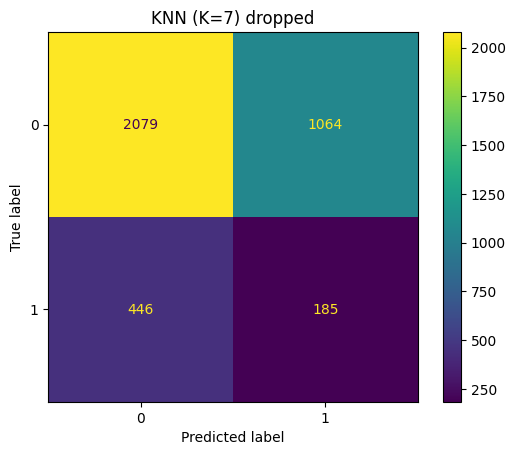

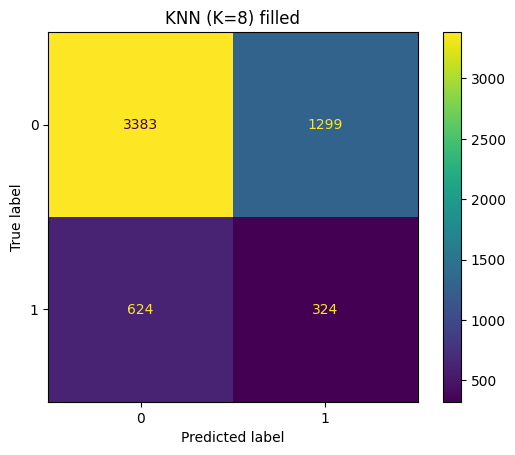

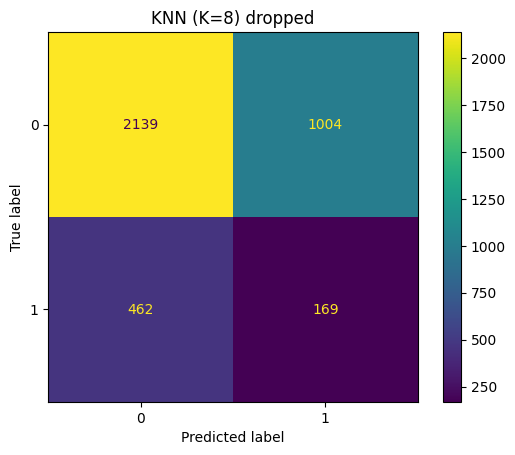

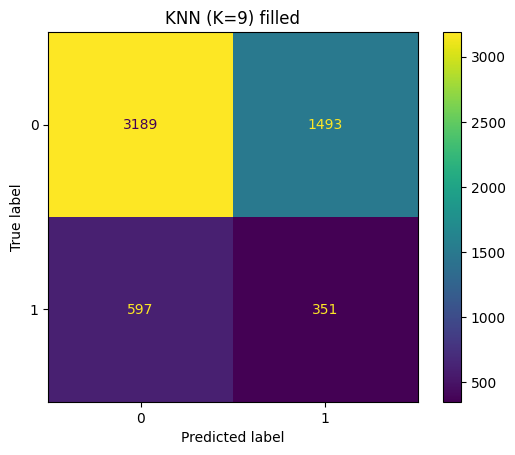

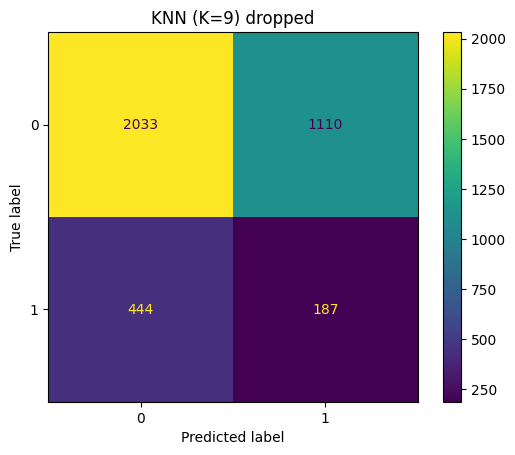

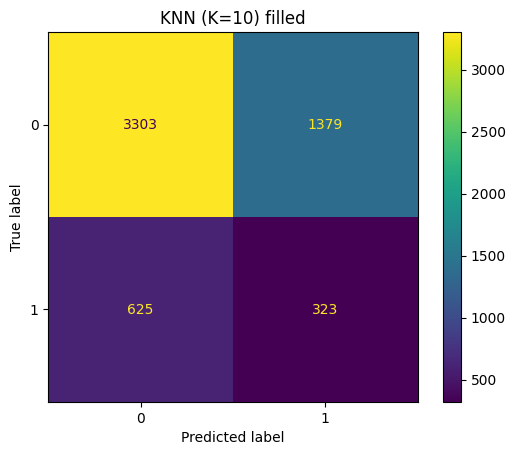

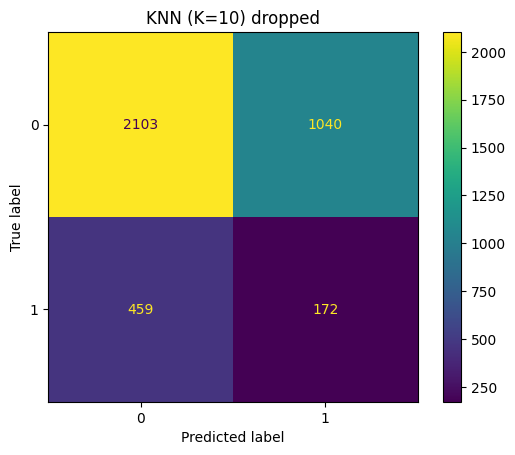

In [71]:
df_drop = []
acc_drop = []
fscore_drop = []
df_fill = []
acc_fill = []
fscore_fill = []
for nk in range(3,11):
    pipe_knn = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', KNeighborsClassifier(n_neighbors=nk))
    ])
    title_f = "KNN (K=" + str(nk) + ") filled"
    df_knn_filled, acc_knn_filled = eval_cross_validation(pipe_knn, skf, X_filled, y_filled, title_f)
    fscore_knn_filled = cross_val_score(pipe_knn, 
                                  X_filled, 
                                  y_filled, 
                                  scoring ='f1',
                                  cv = skf)
    df_fill.append(df_knn_filled)
    acc_fill.append(acc_knn_filled)
    fscore_fill.append(fscore_knn_filled.mean())
    title_d = "KNN (K=" + str(nk) + ") dropped"
    df_knn_dropped, acc_knn_dropped = eval_cross_validation(pipe_knn, skf, X_dropped, y_dropped, title_d)
    fscore_knn_dropped = cross_val_score(pipe_knn, 
                                  X_dropped, 
                                  y_dropped, 
                                  scoring ='f1',
                                  cv = skf)
    df_drop.append(df_knn_dropped)
    acc_drop.append(acc_knn_dropped)
    fscore_drop.append(fscore_knn_dropped.mean())

In [72]:
fscore_fill

[0.693074124754449,
 0.7084175343050358,
 0.6669666248607186,
 0.6722644362237299,
 0.6265772981602085,
 0.6243191765714563,
 0.5938921420277736,
 0.5954430644437361]

In [73]:
fscore_drop

[0.6748779371880447,
 0.6850414445333898,
 0.6428271931115332,
 0.6544248121899339,
 0.6112129092758843,
 0.6154957030215803,
 0.5829832148637779,
 0.5813722134693787]

The best k for both datasets is 4

In [74]:
classifiers_list.append("KNN \n(K=4)")
fscore_filled_list.append(fscore_fill[1])
fscore_dropped_list.append(fscore_drop[1])

In [75]:
acc_fill_list = [acc_dec_tree_filled, acc_adaboost_filled, acc_random_forest_filled, acc_naivebayes_filled, acc_logreg_filled, acc_fill[1]]
acc_drop_list = [acc_dec_tree_dropped, acc_adaboost_dropped, acc_random_forest_dropped, acc_naivebayes_dropped, acc_logreg_dropped, acc_drop[1]]

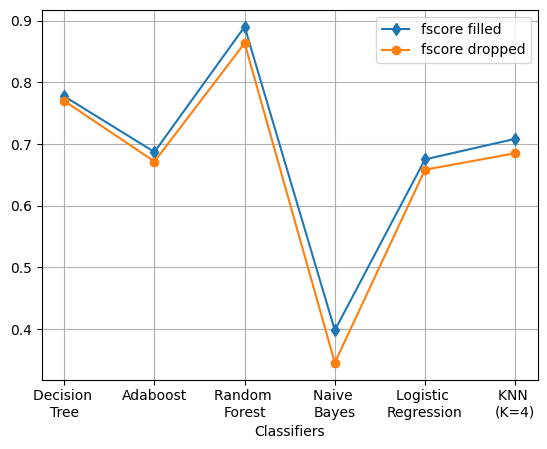

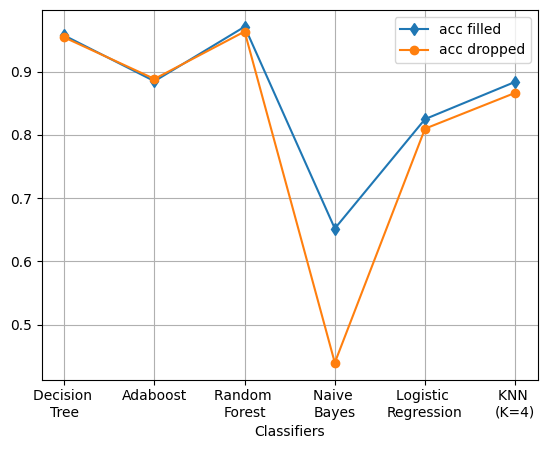

In [76]:
plt.plot(classifiers_list,fscore_filled_list,'d-',label = 'fscore filled')
plt.plot(classifiers_list,fscore_dropped_list, 'o-', label = 'fscore dropped')
plt.legend()
plt.xlabel('Classifiers')
plt.grid()
plt.show()
plt.plot(classifiers_list,acc_fill_list,'d-',label = 'acc filled')
plt.plot(classifiers_list,acc_drop_list, 'o-', label = 'acc dropped')
plt.legend()
plt.xlabel('Classifiers')
plt.grid()
plt.show()

This study told us two evident indications:<br>
    1) The dataset where the missing values were filled gave us higher fscore and accuracy independently of the classifier<br>
    2) Random Forest is the best classifier with respect to both fscore and accuracy<br>

In [77]:
fscore_df_f = [fscore_dec_tree_filled, fscore_adaboost_filled, fscore_random_forest_filled, fscore_naivebayes_filled, fscore_logreg_filled, fscore_knn_filled]
fscore_df_d = [fscore_dec_tree_dropped, fscore_adaboost_dropped, fscore_random_forest_dropped, fscore_naivebayes_dropped, fscore_logreg_dropped, fscore_knn_dropped]

In [78]:
for i in range(0,6):
    metrics=pd.DataFrame({'Filled': fscore_df_f[i], 'Dropped' : fscore_df_d[i]})
    res_w = wilcoxon(metrics.Filled, metrics.Dropped)
    print(classifiers_list[i])
    print(res_w)
    print()

Decision 
Tree
WilcoxonResult(statistic=6.0, pvalue=0.8125)

Adaboost
WilcoxonResult(statistic=3.0, pvalue=0.3125)

Random 
Forest
WilcoxonResult(statistic=0.0, pvalue=0.0625)

Naive 
Bayes
WilcoxonResult(statistic=0.0, pvalue=0.0625)

Logistic 
Regression
WilcoxonResult(statistic=3.0, pvalue=0.3125)

KNN 
(K=4)
WilcoxonResult(statistic=4.0, pvalue=0.4375)



We can see that for every classifier the pvalue is greater than 0.05, so we cannot reject the null hypothesis (which tells that the two related paired samples come from the same distribution). We have to conclude that there is no statistically significant differences between the filled and the dropped dataframes. We can still tell that Random Forest applied on the filled dataframe is the best choice, because it's not difficult to fill the null values and it gave us the best fscore. 